# Load Data

In [2]:
import pandas as pd

df = pd.read_csv("macro_monthly.csv")
df


,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.400
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.900
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.400
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.000
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.800
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2021-06-01,5.9,9.5,20463.275,15603.3,15802.0,115.39,1.519091,0.078000,1579265.0,100.4704,278.140
486,2021-07-01,5.4,10.6,20589.975,15739.4,15804.8,117.01,1.318571,0.098065,1581128.0,101.2442,279.054
487,2021-08-01,5.2,9.9,20788.780,15723.0,15975.8,117.27,1.283182,0.092258,1596816.0,101.1061,279.338
488,2021-09-01,4.8,8.2,20981.450,15468.7,16076.4,117.16,1.374762,0.079333,1594756.0,100.0811,280.017


In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
156,1994-01-01,6.6,7.1,3481.800,7363.1,4585.1,105.21,5.750500,3.050645,513314.0,67.0596,154.5
157,1994-02-01,6.6,6.5,3459.675,7377.2,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8
158,1994-03-01,6.5,6.8,3476.975,7401.7,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3
159,1994-04-01,6.4,6.4,3507.150,7402.0,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5
160,1994-05-01,6.1,7.6,3472.840,7487.4,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9


# Explore Lagging Relationships

<Figure size 600x400 with 0 Axes>

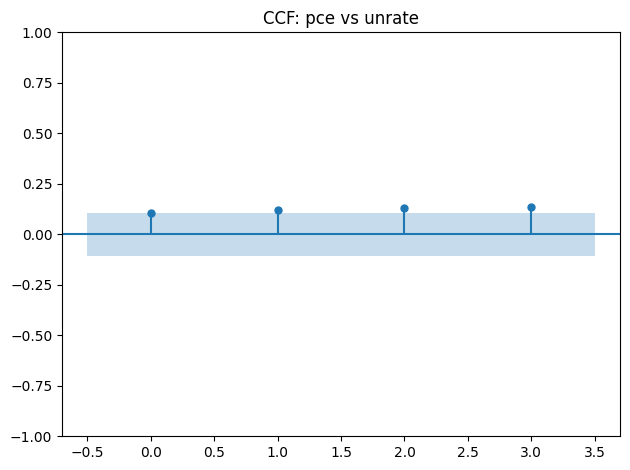

<Figure size 600x400 with 0 Axes>

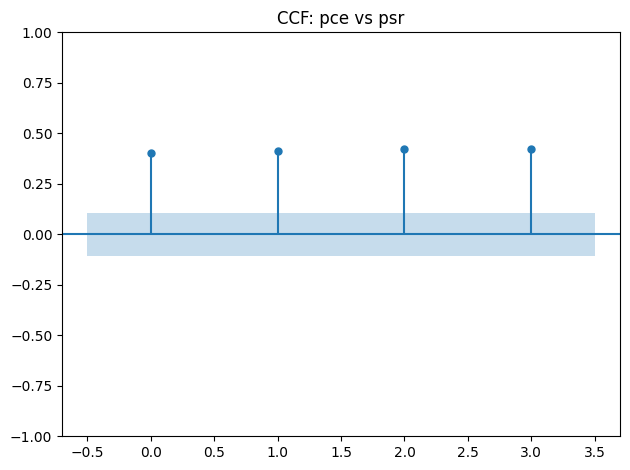

<Figure size 600x400 with 0 Axes>

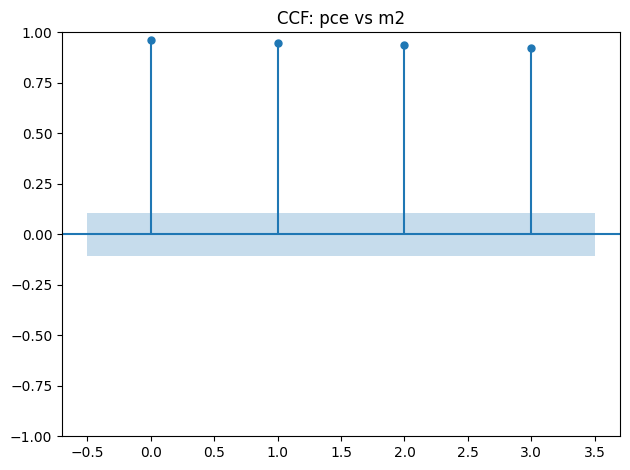

<Figure size 600x400 with 0 Axes>

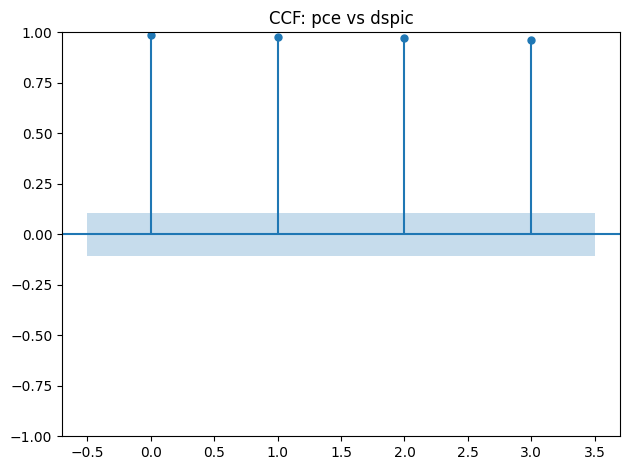

<Figure size 600x400 with 0 Axes>

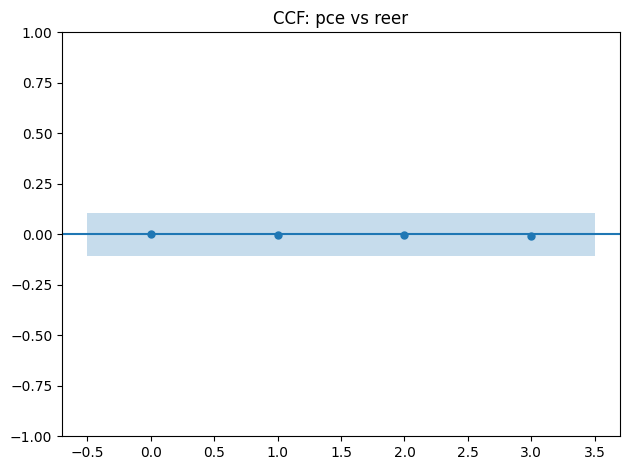

<Figure size 600x400 with 0 Axes>

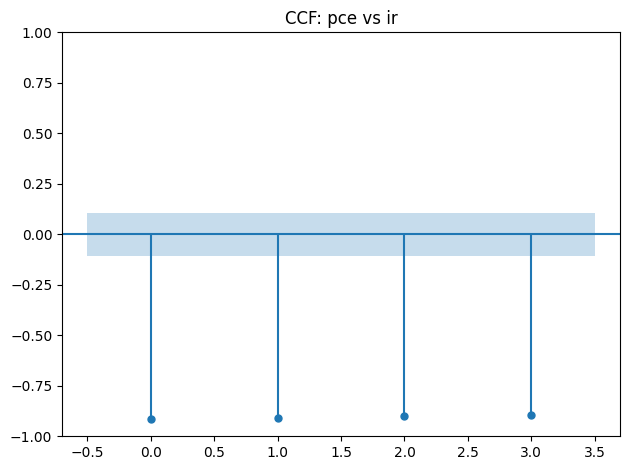

<Figure size 600x400 with 0 Axes>

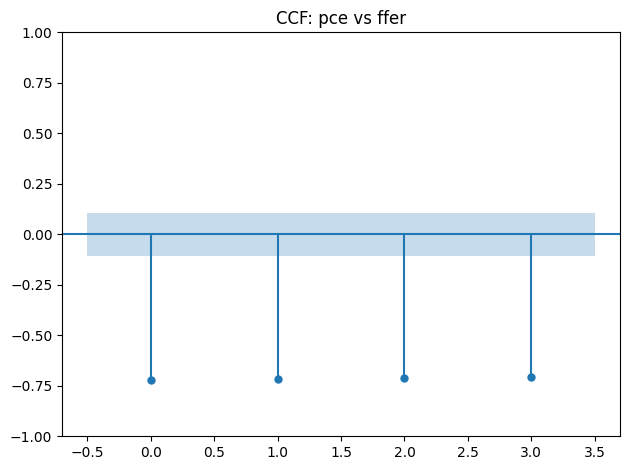

<Figure size 600x400 with 0 Axes>

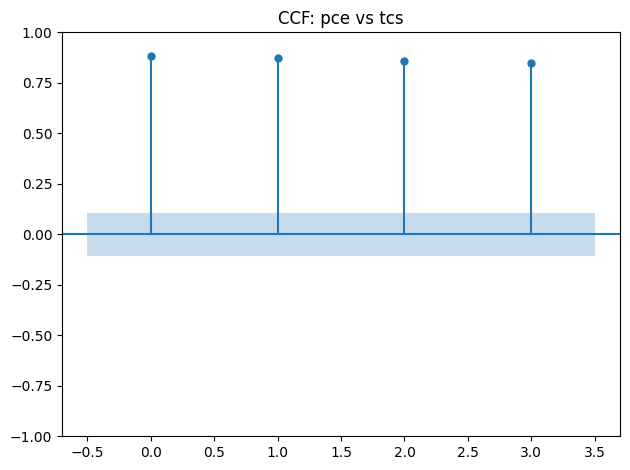

<Figure size 600x400 with 0 Axes>

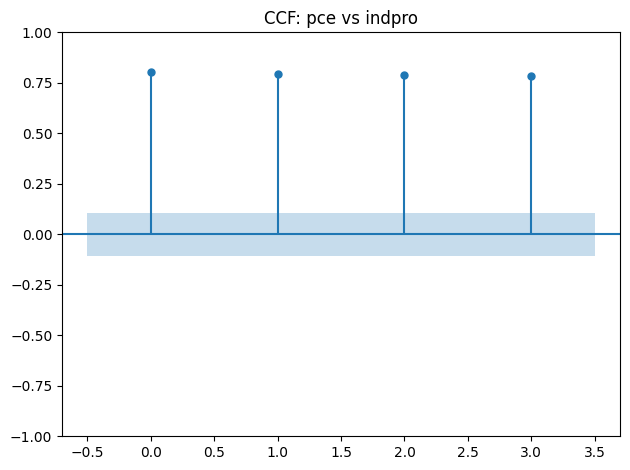

<Figure size 600x400 with 0 Axes>

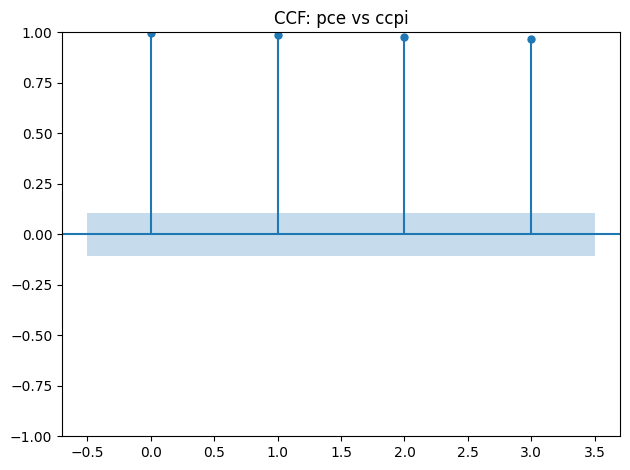

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_ccf
from statsmodels.tsa.stattools import grangercausalitytests

df["DATE"] = pd.to_datetime(df["DATE"], errors='coerce')
df.dropna(subset=["DATE"], inplace=True)  # Drop rows where date conversion failed
df.set_index("DATE", inplace=True)  # Set as index
df.sort_index(inplace=True)     # Sort by datetime index


pce = df["pce"]
exog_df = df.drop(columns="pce")

for col in exog_df.columns:
    plt.figure(figsize=(6, 4))
    plot_ccf(pce, exog_df[col], lags=3)
    plt.title(f'CCF: pce vs {col}')
    plt.tight_layout()
    plt.show()


# Stationarity Tests

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['pce'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 1.3501799389094078
p-value: 0.9968756359104267


In [7]:
series_diff = df['pce'].diff().dropna()


result = adfuller(series_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.48984397070878
p-value: 2.1877685205164277e-06


ADF Statistic: -1.2130062624227462
p-value: 0.6679758709030559


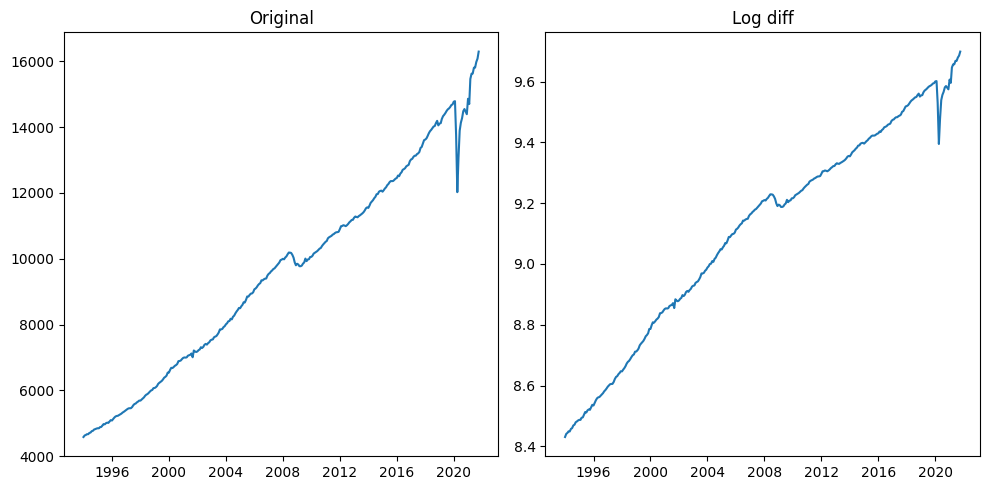

In [21]:
import numpy as np
series = df['pce']

series_log =(np.log(series))

result = adfuller(series_log)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(series)
plt.title("Original")

plt.subplot(1, 2, 2)
plt.plot(series_log)
plt.title("Log diff")

plt.tight_layout()
plt.show()


ADF Statistic: 0.4158957890186
p-value: 0.9820797520187066
Critical Value (1%): -3.4508226600665037
Critical Value (5%): -2.870558121868621
Critical Value (10%): -2.571574731684734


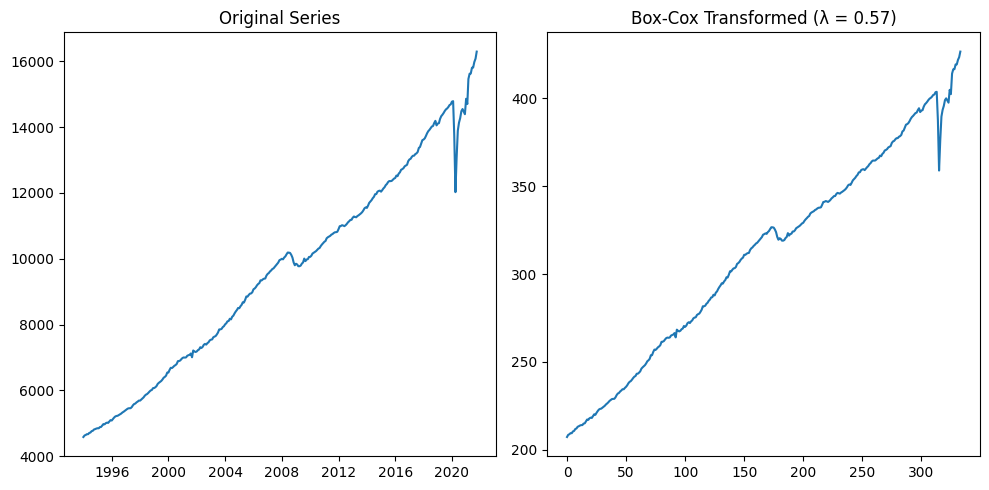

In [9]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt



# Apply Box-Cox transformation
series_boxcox, lambda_bc = boxcox(series)


# Run ADF test
adf_result = adfuller(series_boxcox)

# Print ADF results
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")


# Plot original and transformed
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(series)
plt.title('Original Series')

plt.subplot(1, 2, 2)
plt.plot(series_boxcox)
plt.title(f'Box-Cox Transformed (λ = {lambda_bc:.2f})')
plt.tight_layout()
plt.show()


In [10]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Original series
series = df['pce']

# Shift if needed to make all values positive
if any(series <= 0):
    series += abs(series.min()) + 1

# Apply Box-Cox transformation
series_boxcox, lambda_bc = boxcox(series)



MSE: 312521.72


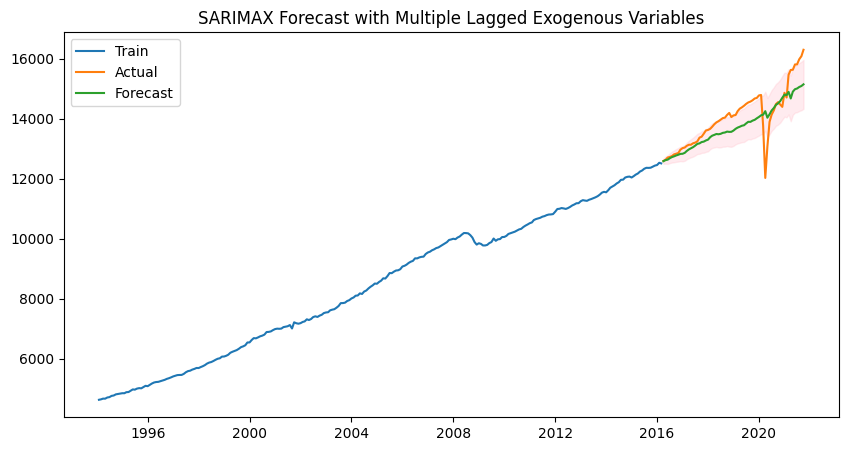

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Set datetime index and frequency
df.index = pd.to_datetime(df.index)
df = df.asfreq('MS')

y = df['pce']

exog_vars = ['unrate', 'psr', 'm2', 'dspic', 'reer', 'ir', 'ffer', 'tcs', 'indpro', 'ccpi']

# Exogenous variables (lag all by 1 month)
X = df[exog_vars].shift(1)

# Combine and drop missing values
df_model = pd.concat([y, X], axis=1).dropna()
y = df_model['pce']
X = df_model[exog_vars]

# Train-test split (80/20)
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

# Fit SARIMAX
model = SARIMAX(y_train,
                exog=X_train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),  # Assuming yearly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.get_forecast(steps=len(y_test), exog=X_test)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Evaluate
mse = mean_squared_error(y_test, pred_mean)
print(f'MSE: {mse:.2f}')

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(pred_mean.index, pred_mean, label='Forecast')
plt.fill_between(pred_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecast with Multiple Lagged Exogenous Variables')
plt.show()


# Fit entire data to model for simulation

c:\Users\David\Documents\Github\EconoGym\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


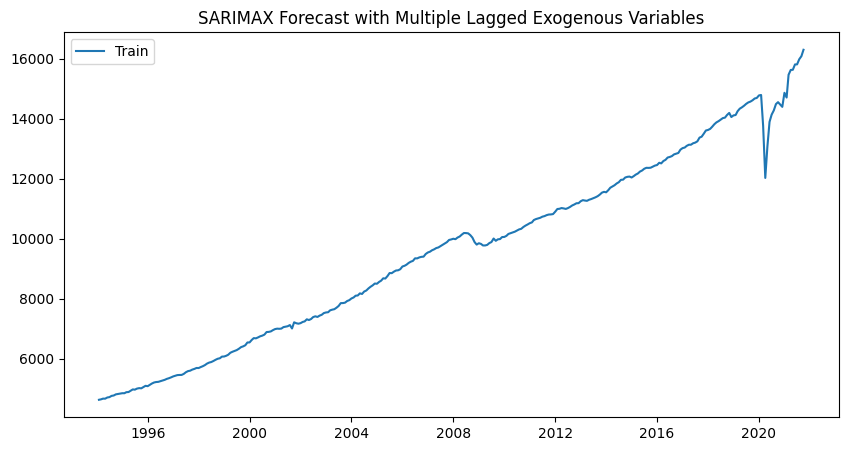

In [15]:
train_size = int(len(y) * 1)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

# Fit SARIMAX
model = SARIMAX(y_train,
                exog=X_train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),  # Assuming yearly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_train.index, y_train, label='Train')
plt.legend()
plt.title('SARIMAX Forecast with Multiple Lagged Exogenous Variables')
plt.show()


# Monte Carlo Simulation (This version assumes no correlation between exogenous values which is definitively unrealistic)

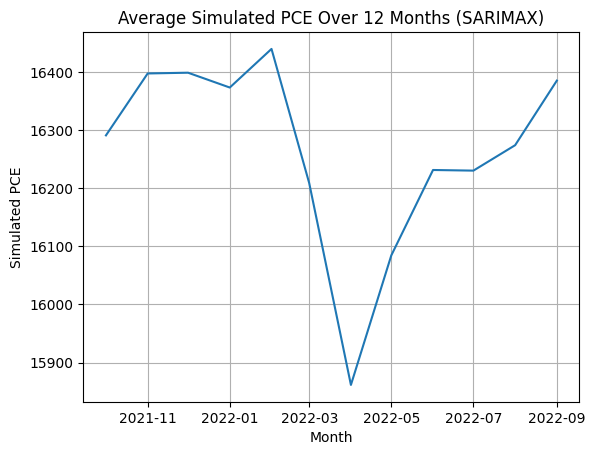

In [20]:
n_simulations = 1000
n_months = 12
initial_values = df[exog_vars].iloc[-1]
initial_pce = df['pce'].iloc[-1]

sim_spend = np.zeros((n_simulations, n_months))
sim_exog_list = []

exog_diffs = df[exog_vars].diff().dropna()
mu = exog_diffs.mean()
sigma = exog_diffs.std()

np.random.seed(42)

for i in range(n_simulations):
    # Ensure numeric dtype
    sim_exog = pd.DataFrame(np.nan, columns=exog_vars, index=range(n_months))
    sim_exog.iloc[0] = initial_values

    for t in range(1, n_months):
        random_change = np.random.normal(mu, sigma)
        sim_exog.iloc[t] = sim_exog.iloc[t-1] + random_change

    exog_for_prediction = sim_exog.shift(1).dropna()

    # Create matching datetime index
    last_known_date = df.index[-1]
    forecast_index = pd.date_range(start=last_known_date + pd.DateOffset(months=1),
                                   periods=len(exog_for_prediction),
                                   freq='MS')
    exog_for_prediction.index = forecast_index

    # Predict using datetime-based range
    forecast = model_fit.predict(start=forecast_index[0],
                                 end=forecast_index[-1],
                                 exog=exog_for_prediction)

    sim_spend[i, 0] = initial_pce
    for t in range(1, n_months):
        sim_spend[i, t] = forecast.iloc[t-1]
    sim_exog_list.append(sim_exog.copy())

# Plot
future_dates = pd.date_range(start=last_known_date + pd.DateOffset(months=0), periods=n_months, freq='MS')
plt.plot(future_dates, sim_spend.mean(axis=0))
plt.title('Average Simulated PCE Over 12 Months (SARIMAX)')
plt.xlabel('Month')
plt.ylabel('Simulated PCE')
plt.grid(True)
plt.show()

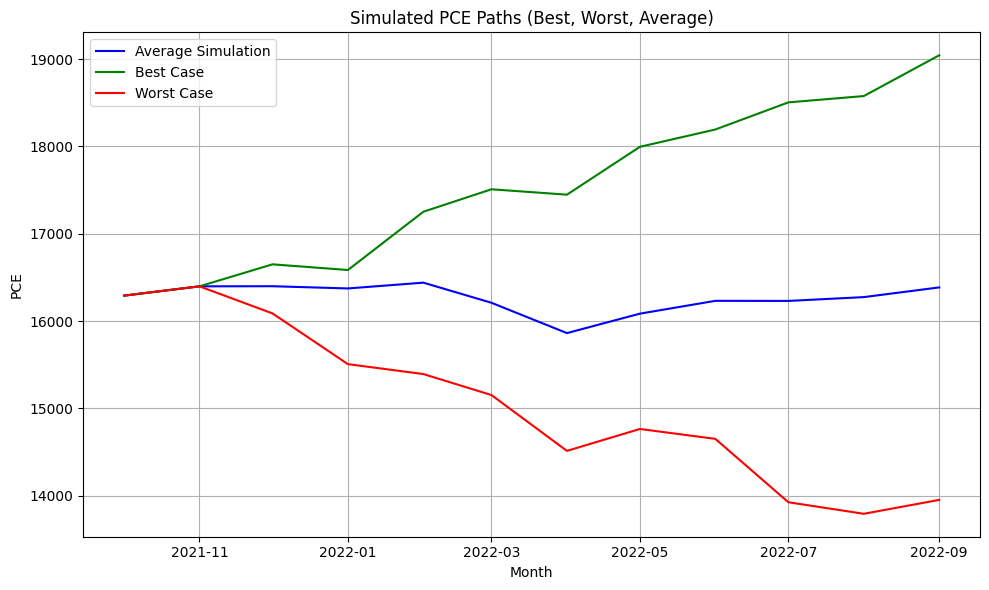

In [17]:
best_idx = np.argmax(sim_spend[:, -1])      # Row index with highest final PCE
best_path = sim_spend[best_idx]

worst_idx = np.argmin(sim_spend[:, -1])     # Row index with lowest final PCE
worst_path = sim_spend[worst_idx]



future_dates = pd.date_range(start=last_known_date, periods=n_months, freq='MS')

plt.figure(figsize=(10, 6))
plt.plot(future_dates, sim_spend.mean(axis=0), label='Average Simulation', color='blue')
plt.plot(future_dates, best_path, label='Best Case', color='green')
plt.plot(future_dates, worst_path, label='Worst Case', color='red')
plt.legend()
plt.title('Simulated PCE Paths (Best, Worst, Average)')
plt.xlabel('Month')
plt.ylabel('PCE')
plt.grid(True)
plt.tight_layout()
plt.show()


